# Final Project - Student Score Prediction 

This project follows the required steps:

1. Preprocess the data
2. Visualize the data
3. Split the data
4. Train a Linear Regression model
5. Evaluate the model
6. Document the work



In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load dataset

df = pd.read_csv("student_performance_dataset.csv")
print("Dataset shape: ", df.shape)
print(df.head())

Dataset shape:  (708, 10)
  Student_ID  Gender  Study_Hours_per_Week  Attendance_Rate  Past_Exam_Scores  \
0       S147    Male                    31        68.267841                86   
1       S136    Male                    16        78.222927                73   
2       S209  Female                    21        87.525096                74   
3       S458  Female                    27        92.076483                99   
4       S078  Female                    37        98.655517                63   

  Parental_Education_Level Internet_Access_at_Home Extracurricular_Activities  \
0              High School                     Yes                        Yes   
1                      PhD                      No                         No   
2                      PhD                     Yes                         No   
3                Bachelors                      No                         No   
4                  Masters                      No                        Yes   



In [3]:
# Remove Student_ID column because it's just an identifier and not useful for prediction

df = df.drop(columns=['Student_ID'])

In [ ]:
# 1.Preprocess the data
# Handle missing values

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

for col in numeric_cols:
    df[col] = df[col].fillna(df[col].mean())

for col in cat_cols:
    most_frequent = df[col].mode()[0]
    df[col] = df[col].fillna(most_frequent)

# Transform categorical

if len(cat_cols) > 0:
    df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print("After preprocessing: ", df.head())

After preprocessing:     Study_Hours_per_Week  Attendance_Rate  Past_Exam_Scores  Final_Exam_Score  \
0                    31        68.267841                86                63   
1                    16        78.222927                73                50   
2                    21        87.525096                74                55   
3                    27        92.076483                99                65   
4                    37        98.655517                63                70   

   Gender_Male  Parental_Education_Level_High School  \
0         True                                  True   
1         True                                 False   
2        False                                 False   
3        False                                 False   
4        False                                 False   

   Parental_Education_Level_Masters  Parental_Education_Level_PhD  \
0                             False                         False   
1                     

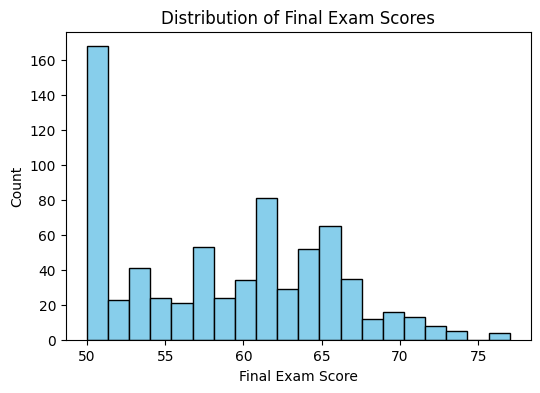

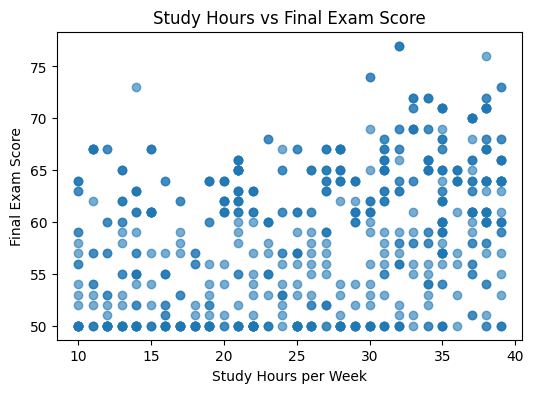

In [5]:
# 2.Visualize the data

plt.figure(figsize=(6,4))
plt.hist(df['Final_Exam_Score'], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Final Exam Scores")
plt.xlabel("Final Exam Score")
plt.ylabel("Count")
plt.show()

if "Study_Hours_per_Week" in df.columns:
    plt.figure(figsize=(6,4))
    plt.scatter(df["Study_Hours_per_Week"], df["Final_Exam_Score"], alpha=0.6)
    plt.title("Study Hours vs Final Exam Score")
    plt.xlabel("Study Hours per Week")
    plt.ylabel("Final Exam Score")
    plt.show()

In [6]:
# 3.Split the data

X = df.drop(columns=['Final_Exam_Score'])
y = df['Final_Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (566, 10), Test shape: (142, 10)


In [7]:
# 4.Train Linear Regression model

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [8]:
# 5.Evaluate the model

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)*100
print('Mean Squared Error (MSE): ', mse)
print('R-squared (R²): ', r2)

Mean Squared Error (MSE):  6.801673628992004
R-squared (R²):  84.01298239083286


In [9]:
# 6) Documentation/Summary
summary_text = f"""
Final Project - Student Performance Prediction

In this project, I analyzed student data to predict their final exam scores.
I handled missing values, transformed categorical variables, and visualized
key patterns such as the distribution of scores and the relationship between
study hours and exam results.

After splitting the dataset (80/20) and training a Linear Regression model,
the evaluation showed:
- MSE = {mse:.2f}
- R² = {r2:.2f}

This means the model explains about {r2*100:.1f}% of the variance in exam scores.
"""
with open("project_summary.txt", "w", encoding="utf-8") as f:
    f.write(summary_text)

print("\nSummary saved to project_summary.txt")


Summary saved to project_summary.txt
